In [150]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [151]:
def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    cube_region = cube_region_tmp.intersection(latitude=(lat_south, lat_north))
    return cube_region

In [152]:
file = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5_1989.nc'

In [153]:
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_19890101.nc','sea_surface_temperature')[0]
obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_1989.nc','sea_surface_temperature')

In [163]:
obs_cube = obs_cube[0]

In [154]:
# cube = iris.load_cube(file)[0]

cube = iris.load_cube(file)
cube = cube.collapsed('time',iris.analysis.MEAN)

/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'time'.
  warnings.warn(msg.format(self.name()))


In [155]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

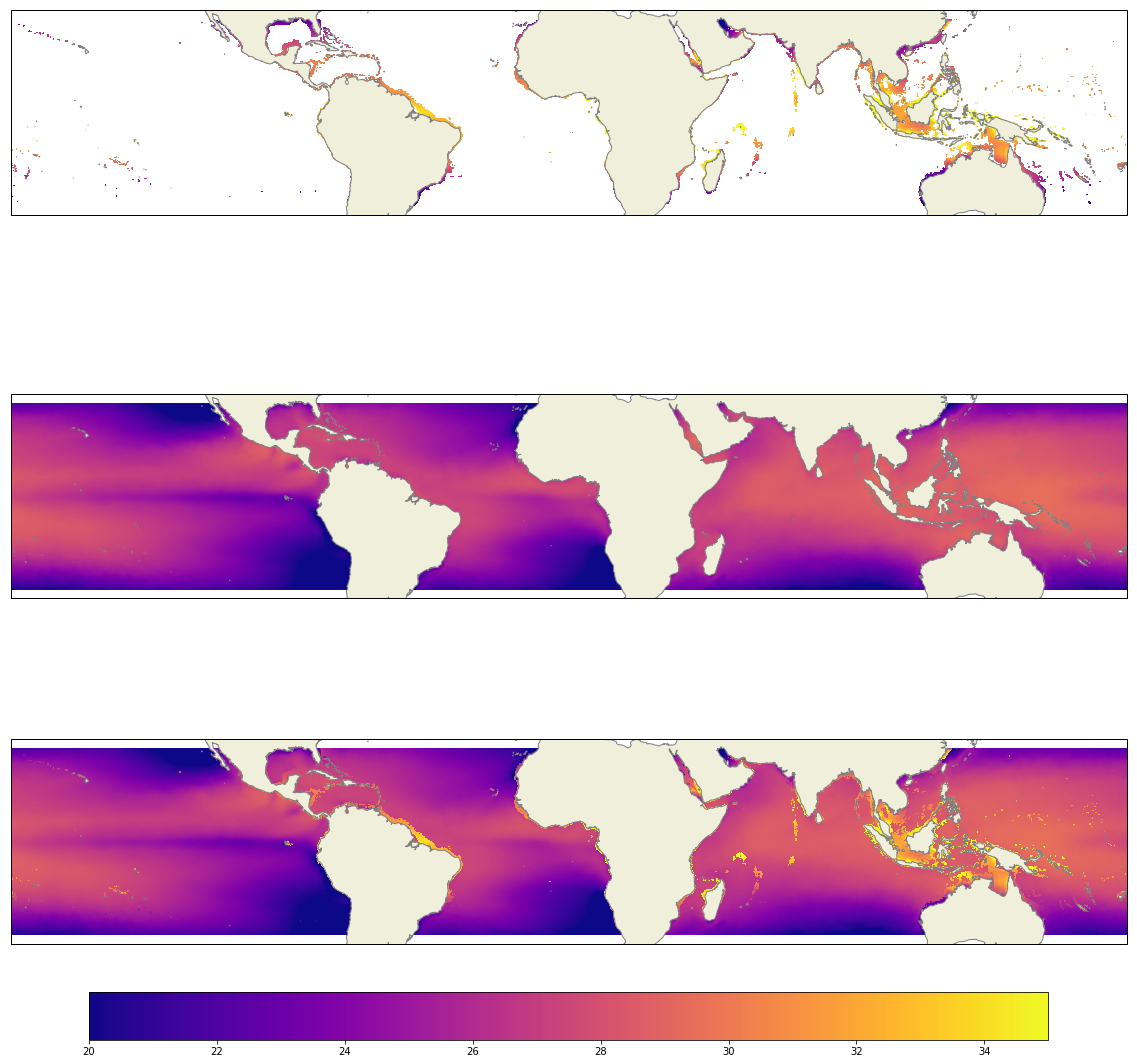

In [179]:
cube_0 = cube
cube_0_data = cube_0.data
lat = cube_0.coord('latitude').points
lon = cube_0.coord('longitude').points

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+180, lat,cube_0_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')

#########

lon_west = -180
lon_east = 180
lat_south = -30.0
lat_north = 30.0

obs_cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

obs_cube_data = obs_cube_region.data
lat2 = obs_cube_region.coord('latitude').points
lon2 = obs_cube_region.coord('longitude').points

ax = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon2, lat2,obs_cube_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')

####

ax = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree())

p = ax.pcolormesh(lon2, lat2,obs_cube_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
p = ax.pcolormesh(lon+180, lat,cube_0_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')

# plt.gca().coastlines('10m')
plt.colorbar(p,orientation='horizontal')

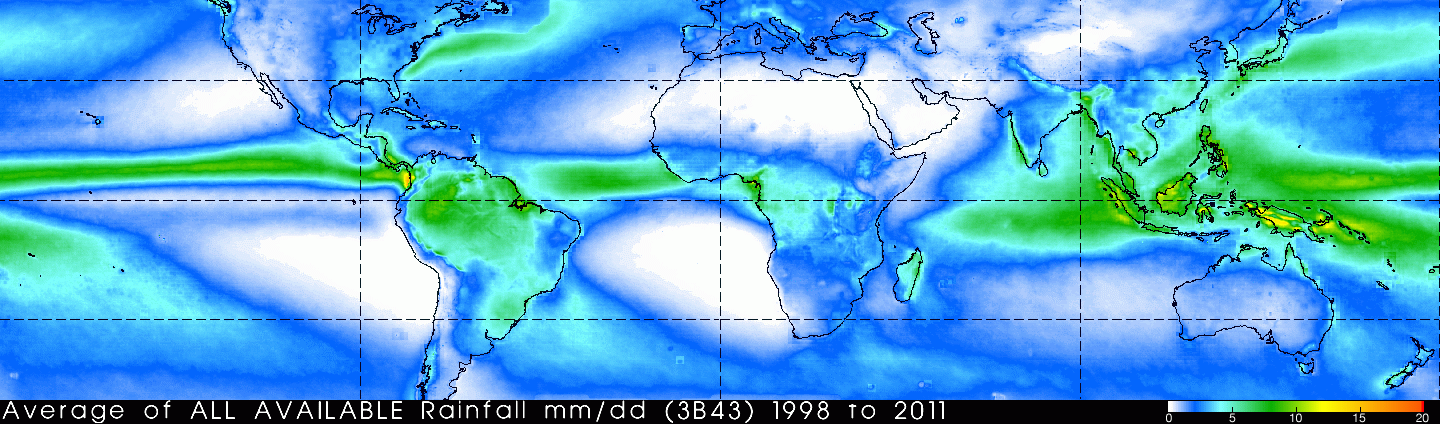

In [178]:

from IPython.display import Image
Image(filename='/Users/ph290/Downloads/global_tropics/TRMM.png') 

The SSTs seem to be overestimated where there is high precip. I hypothesis that this is due to the model not being able to loose enough heat (and maybe gaining too much heat) where there is high levels of high cloud. I plan to address this be prescribing aspects of the surface radiation from the forcing dataset rather than allwing s2p3 to calcuate these thinsg based on cloud amount.

### Note, satilite SST is night time, model is daily mean

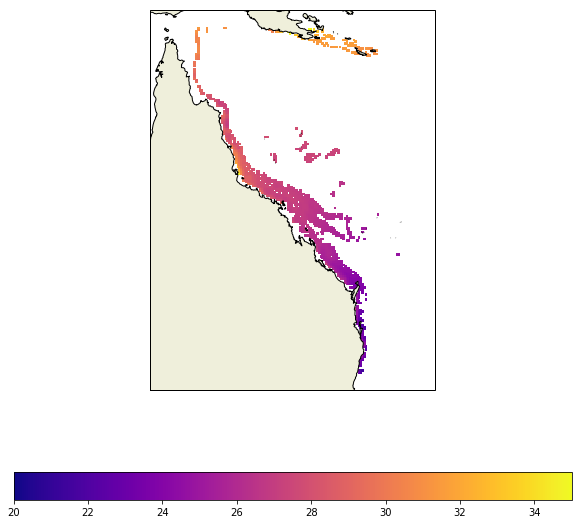

In [160]:
lon_west = 142.0+180
lon_east = 157.0+180
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_10m, edgecolor='k')

plt.colorbar(p,orientation='horizontal')

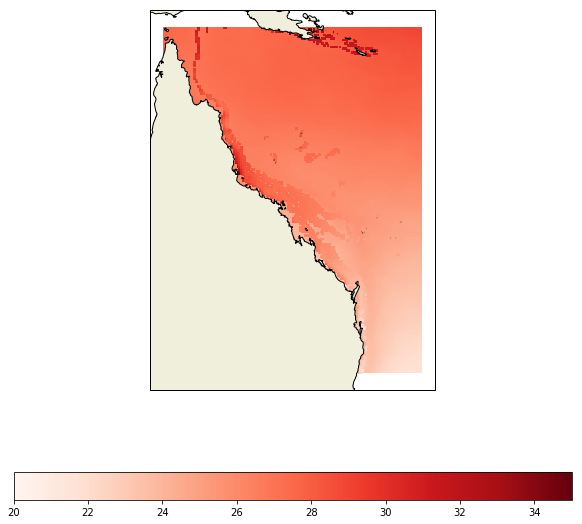

In [169]:
lon_west = 142+360.0
lon_east = 157+360.0
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+360, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)

lon_west = 142.0+180
lon_east = 157.0+180
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')

ax.add_feature(land_10m, edgecolor='k')

plt.colorbar(p,orientation='horizontal')

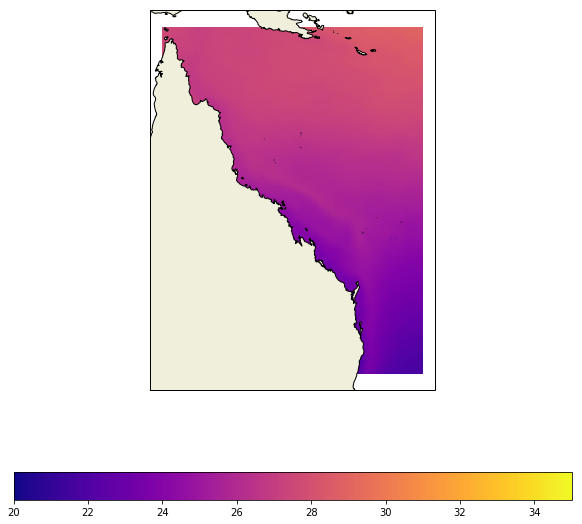

In [165]:
lon_west = 142+360.0
lon_east = 157+360.0
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+360, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_10m, edgecolor='k')

plt.colorbar(p,orientation='horizontal')

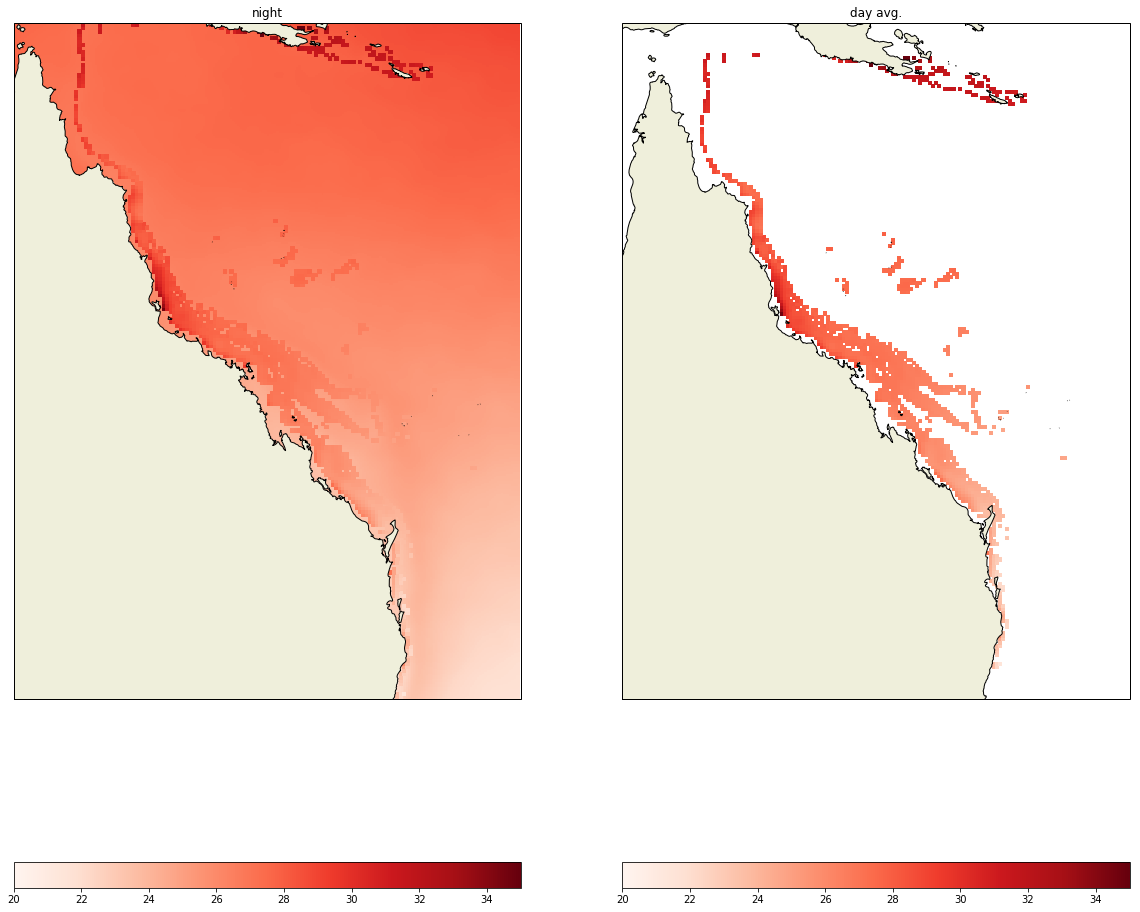

In [171]:
lon_west = 142+360
lon_east = 157+360
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+360, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)

lon_west = 142+180
lon_east = 157+180
lat_south = -30.0
lat_north = -10.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

p = ax.contour(lon+180, lat,cube_region_data,levels=[20],
                transform=ccrs.PlateCarree(),colors='k')



p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')

ax.add_feature(land_10m, edgecolor='k')
plt.colorbar(p,orientation='horizontal')

plt.title('night')


####

ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points


p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')

ax.add_feature(land_10m, edgecolor='k')

plt.title('day avg.')

plt.colorbar(p,orientation='horizontal')

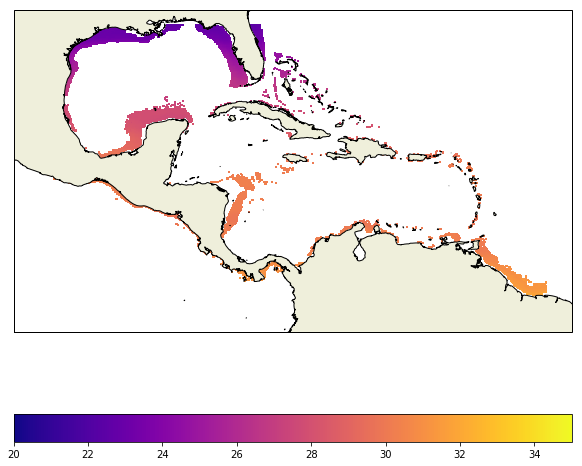

In [166]:
lon_west = -100+180
lon_east = -55+180
lat_south = 4.0
lat_north = 34.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_10m, edgecolor='k')


plt.colorbar(p,orientation='horizontal')

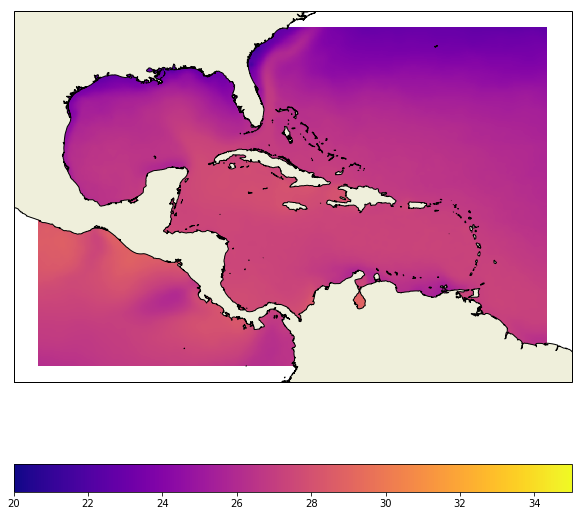

In [167]:
lon_west = -100+360
lon_east = -55+360
lat_south = 4.0
lat_north = 34.0

cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+360, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_10m, edgecolor='k')

plt.colorbar(p,orientation='horizontal')

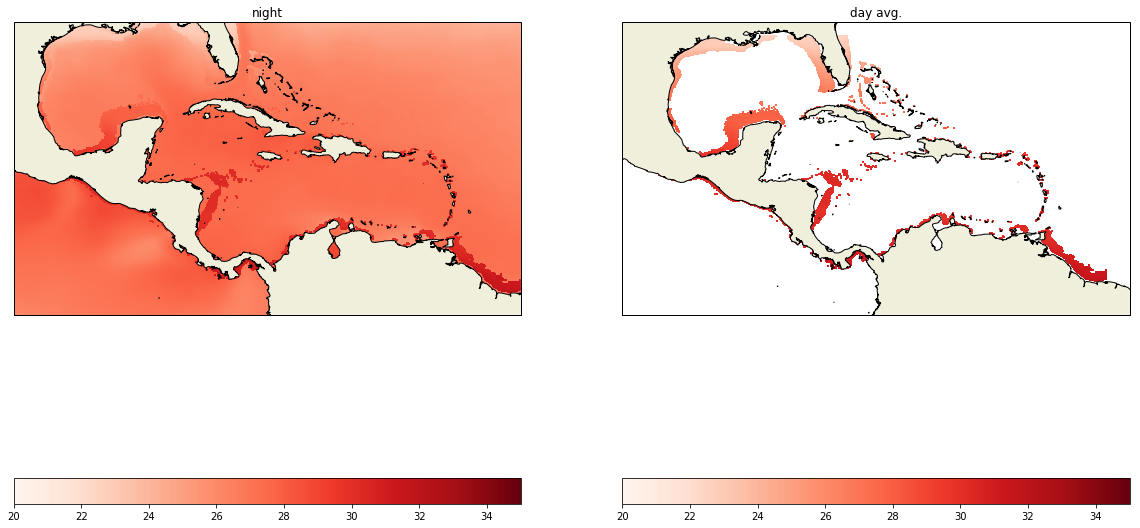

In [168]:
lon_west = -100+360
lon_east = -55+360
lat_south = 4.0
lat_north = 30.0

cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+360, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)

lon_west = -100+180
lon_east = -55+180
lat_south = 4.0
lat_north = 30.0

cube_region = extract_region(cube_0,lon_west,lon_east,lat_south,lat_north)

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points

p = ax.contour(lon+180, lat,cube_region_data,levels=[20],
                transform=ccrs.PlateCarree(),colors='k')



p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')

ax.add_feature(land_10m, edgecolor='k')
plt.colorbar(p,orientation='horizontal')

plt.title('night')


####

ax = fig.add_subplot(1, 2, 2, projection=ccrs.PlateCarree())

cube_region_data = cube_region.data
lat = cube_region.coord('latitude').points
lon = cube_region.coord('longitude').points


p = ax.pcolormesh(lon+180, lat,cube_region_data,
                transform=ccrs.PlateCarree(),vmin=20,vmax=35,
                cmap='Reds')

ax.add_feature(land_10m, edgecolor='k')

plt.title('day avg.')

plt.colorbar(p,orientation='horizontal')

# Bottom temperatures

In [181]:
file2 = '/Users/ph290/Downloads/global_tropics/surface_temperature_global_tropics_era5_1981.nc'
file3 = '/Users/ph290/Downloads/global_tropics/bottom_temperature_global_tropics_era5_1981.nc'

cube_1981_surf = iris.load_cube(file2)
cube_1981_bott = iris.load_cube(file3)

cube_1981_surf = cube_1981_surf.collapsed('time',iris.analysis.MEAN)
cube_1981_bott = cube_1981_bott.collapsed('time',iris.analysis.MEAN)

In [187]:
cube_0 = cube_1981_surf - cube_1981_bott
cube_0_data = cube_0.data


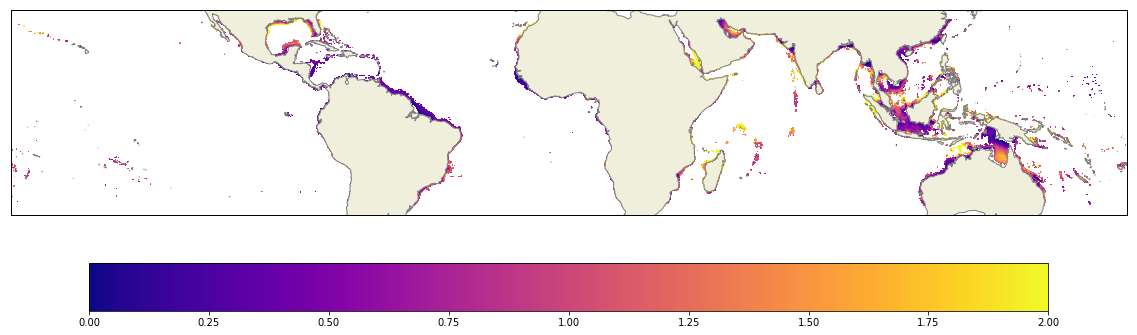

In [186]:
lat = cube_0.coord('latitude').points
lon = cube_0.coord('longitude').points

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
p = ax.pcolormesh(lon+180, lat,cube_0_data,
                transform=ccrs.PlateCarree(),vmin=0,vmax=2,
                cmap='plasma')
# plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
ax.add_feature(land_50m, edgecolor='gray')
plt.colorbar(p,orientation='horizontal')

# Notes

I seemed to have downloade drhum at pressure level 975 rather than 1000 so it does not correspond to the surface, which is what i presumably need for latant heat flux. Re-downloading now